In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM
from sklearn.decomposition import PCA

## Tokens and Embeddings

In [ ]:
import re
from transformers import AutoTokenizer

# Sample text
text = "An aeroplane flew over my house."

# Character-level tokenization
character_tokens = list(text)
print("Character-level Tokens:", character_tokens)

# Word-level tokenization
word_tokens = re.findall(r"\w+|[^\w\s]", text, re.UNICODE)
print("Word-level Tokens:", word_tokens)

Character-level Tokens: ['A', 'n', ' ', 'a', 'e', 'r', 'o', 'p', 'l', 'a', 'n', 'e', ' ', 'f', 'l', 'e', 'w', ' ', 'o', 'v', 'e', 'r', ' ', 'm', 'y', ' ', 'h', 'o', 'u', 's', 'e', '.']
Word-level Tokens: ['An', 'aeroplane', 'flew', 'over', 'my', 'house', '.']


In [ ]:
# Subword-level tokenization using BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
subword_tokens = tokenizer.tokenize(text)
print("Subword-level Tokens:", subword_tokens)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Subword-level Tokens: ['an', 'aero', '##plane', 'flew', 'over', 'my', 'house', '.']


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
subword_tokens = tokenizer.tokenize(text)
print("Subword-level Tokens:", subword_tokens)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Subword-level Tokens: ['An', 'Ġaer', 'opl', 'ane', 'Ġflew', 'Ġover', 'Ġmy', 'Ġhouse', '.']


In [ ]:
def demonstrate_tokenization():
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    text = "Hello, how are you doing today?"
    tokens = tokenizer.tokenize(text)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    print("Original Text:", text)
    print("Tokens:", tokens)
    print("Token IDs:", token_ids)

def demonstrate_tokenization_gpt():
    tokenizer = AutoTokenizer.from_pretrained("gpt2")
    text = "Hello, how are you doing today?"
    tokens = tokenizer.tokenize(text)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    print("Original Text:", text)
    print("Tokens:", tokens)
    print("Token IDs:", token_ids)

demonstrate_tokenization()
demonstrate_tokenization_gpt()


Original Text: Hello, how are you doing today?
Tokens: ['hello', ',', 'how', 'are', 'you', 'doing', 'today', '?']
Token IDs: [7592, 1010, 2129, 2024, 2017, 2725, 2651, 1029]
Original Text: Hello, how are you doing today?
Tokens: ['Hello', ',', 'Ġhow', 'Ġare', 'Ġyou', 'Ġdoing', 'Ġtoday', '?']
Token IDs: [15496, 11, 703, 389, 345, 1804, 1909, 30]


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`


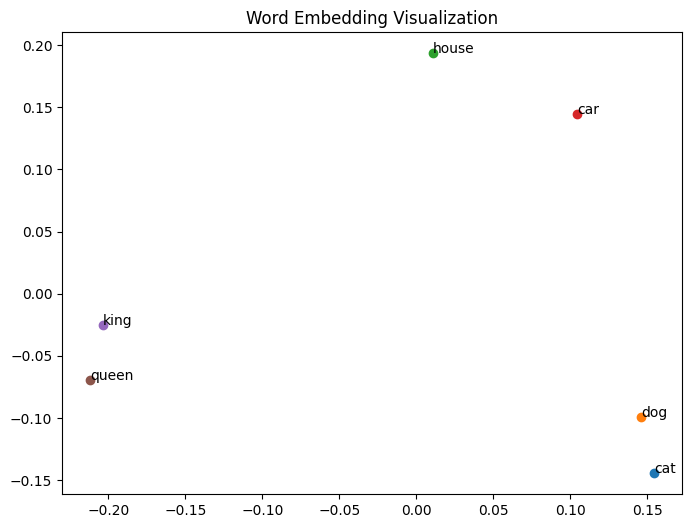

In [ ]:
# Word Embedding Visualization
def visualize_embeddings():
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    model = AutoModelForCausalLM.from_pretrained('bert-base-uncased')

    text = ["cat", "dog", "house", "car", "king", "queen"]
    token_ids = tokenizer(text, return_tensors='pt', padding=True)["input_ids"]

    with torch.no_grad():
        embeddings = model.get_input_embeddings()(token_ids).mean(dim=1)

    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    for i, word in enumerate(text):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.title('Word Embedding Visualization')
    plt.show()

visualize_embeddings()




In [ ]:
# Dummy vocabulary and data
data = [
    ['I', 'am', 'a', 'student'],
    ['You', 'are', 'a', 'teacher'],
    ['She', 'is', 'a', 'doctor'],
    ['They', 'are', 'friends'],
    ['We', 'are', 'happy'],
    ['The', 'cat', 'is', 'sleeping'],
    ['The', 'dog', 'is', 'barking'],
    ['I', 'like', 'pizza'],
    ['He', 'loves', 'music'],
    ['We', 'enjoy', 'learning'],
    ['She', 'has', 'a', 'car'],
    ['He', 'plays', 'football'],
    ['They', 'read', 'books'],
    ['We', 'are', 'going', 'home'],
    ['The', 'sun', 'is', 'shining'],
    ['Birds', 'are', 'flying'],
    ['He', 'is', 'writing', 'a', 'book'],
    ['She', 'bought', 'a', 'new', 'phone'],
    ['They', 'visited', 'the', 'museum'],
    ['We', 'watched', 'a', 'movie'],
    ['The', 'sky', 'is', 'blue'],
    ['The', 'flowers', 'are', 'blooming'],
    ['It', 'is', 'raining', 'outside'],
    ['We', 'cooked', 'dinner'],
    ['She', 'painted', 'a', 'beautiful', 'picture']
]


In [ ]:
# Create Vocabulary
vocab = sorted(set(word for sentence in data for word in sentence))
vocab_size = len(vocab)
word_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_word = {i: word for word, i in word_to_idx.items()}

# Convert sentence to tensor
def sentence_to_tensor(sentence):
    return torch.tensor([word_to_idx[word] for word in sentence], dtype=torch.long)



In [ ]:
# Define Causal Decoder (GPT-like)
class CausalDecoderModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=16, hidden_dim=32):
        super(CausalDecoderModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.rnn(embedded)
        return self.fc(output)

In [ ]:
# Training Function
def train_model(model, data, architecture, epochs=10, lr=0.01):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        for sentence in data:
            input_tensor = sentence_to_tensor(sentence[:-1]).unsqueeze(0)
            target_tensor = sentence_to_tensor(sentence[1:]).unsqueeze(0)
            print(input_tensor)
            print(target_tensor)
            optimizer.zero_grad()
            output = model(input_tensor)
            loss = criterion(output.view(-1, vocab_size), target_tensor.view(-1))
            loss.backward()
            optimizer.step()
        if epoch % 2 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")



In [ ]:
# Prediction Function
def predict_next_word_with_probs(model, input_text, architecture, top_k=5):
    model.eval()
    input_tensor = sentence_to_tensor(input_text).unsqueeze(0)
    with torch.no_grad():

        output = model(input_tensor)

        last_word_logits = output[0, -1, :]
        probabilities = torch.softmax(last_word_logits, dim=-1)

        # Get top-k tokens and their probabilities
        top_probs, top_indices = torch.topk(probabilities, top_k)

        results = [(idx_to_word[idx.item()], prob.item()) for idx, prob in zip(top_indices, top_probs)]

    return results

In [ ]:
# Initialize and Train Models
causal_model = CausalDecoderModel(vocab_size)

print("Training Causal Decoder...")
train_model(causal_model, data, 'causal')

sentence = ['I', 'am', 'a']
sentence2= [ 'Why', 'are','you']

print(f"Causal Decoder Prediction: {predict_next_word_with_probs(causal_model, sentence, 'causal')}")

Training Causal Decoder...
tensor([[ 2, 10,  9]])
tensor([[10,  9, 53]])
tensor([[ 8, 11,  9]])
tensor([[11,  9, 55]])
tensor([[ 4, 34,  9]])
tensor([[34,  9, 23]])
tensor([[ 6, 11]])
tensor([[11, 29]])
tensor([[ 7, 11]])
tensor([[11, 31]])
tensor([[ 5, 20, 34]])
tensor([[20, 34, 52]])
tensor([[ 5, 24, 34]])
tensor([[24, 34, 12]])
tensor([[ 2, 36]])
tensor([[36, 46]])
tensor([[ 1, 37]])
tensor([[37, 40]])
tensor([[ 7, 25]])
tensor([[25, 35]])
tensor([[ 4, 32,  9]])
tensor([[32,  9, 19]])
tensor([[ 1, 47]])
tensor([[47, 28]])
tensor([[ 6, 49]])
tensor([[49, 17]])
tensor([[ 7, 11, 30]])
tensor([[11, 30, 33]])
tensor([[ 5, 54, 34]])
tensor([[54, 34, 50]])
tensor([[ 0, 11]])
tensor([[11, 27]])
tensor([[ 1, 34, 59,  9]])
tensor([[34, 59,  9, 16]])
tensor([[ 4, 18,  9, 41]])
tensor([[18,  9, 41, 44]])
tensor([[ 6, 57, 56]])
tensor([[57, 56, 39]])
tensor([[ 7, 58,  9]])
tensor([[58,  9, 38]])
tensor([[ 5, 51, 34]])
tensor([[51, 34, 15]])
tensor([[ 5, 26, 11]])
tensor([[26, 11, 14]])
tensor([[

In [ ]:
print(f"Causal Decoder Prediction: {predict_next_word_with_probs(causal_model, sentence2, 'causal')}")

KeyError: 'Why'

In [ ]:
sentence3= [ 'We', 'like']


print(f"Causal Decoder Prediction: {predict_next_word_with_probs(causal_model, sentence3, 'causal')}")

Causal Decoder Prediction: [('enjoy', 0.1998654305934906), ('are', 0.1912473887205124), ('watched', 0.11691075563430786), ('cooked', 0.10082307457923889), ('pizza', 0.0988420769572258)]
